In [1]:
import numpy as np
import pandas as pd

import exp3aux.exp3aux as ex3aux
from experiments2.auxiliary.auxiliary import construct_by_kmeans, construct_by_uniform, construct_by_quantiles
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from pgmpy.estimators import K2Score, BicScore

plt.rcParams.update({'font.size': 14})

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images2'

In [2]:
cols = ['mean_right_dir', 'min_right_dir', 'max_right_dir',
                              'mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir',
                              'mean_asc', 'min_asc', 'max_asc',
                              'mean_desc', 'min_desc', 'max_desc',
                              'mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges',
                              'mean_indegree', 'min_indegree', 'max_indegree'] +\
                              [f"indegree for actual {k} indegree" for k in range(11)]

In [68]:
x = list(range(4, 16))
def plot(columns: list, data: pd.DataFrame, labels: list, ylabel: str):
    plt.figure(figsize=(18, 6), edgecolor="black")
    for i in range(len(columns)):
        plt.plot(x, data[columns[i]], label=labels[i])
    plt.xlabel("Number of features")
    plt.ylabel(ylabel, fontsize=18)
    plt.grid(True, color="grey")
    plt.legend(loc="upper left")
    plt.xticks(x, fontsize=18)
    plt.legend(loc="upper left", title="Expected in-degree")
    plt.yticks(fontsize=18)

In [4]:
table = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table.append(ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [5]:
res = pd.DataFrame([table[k] for k in range(12)], columns=cols)
res

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.509722,0.222222,1.000000,0.400000,0.000000,0.666667,0.974359,0.833333,1.0,0.837963,...,1.371795,2.833333,4.166667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.566667,0.250000,0.833333,0.294722,0.083333,0.666667,0.875817,0.000000,1.0,0.847222,...,1.690476,3.513889,4.000000,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.536111,0.250000,0.944444,0.345833,0.055556,0.666667,0.878472,0.500000,1.0,0.885673,...,1.538462,3.176768,4.142857,3.333333,4.666667,-inf,-inf,-inf,-inf,-inf
3,0.585040,0.375000,0.722222,0.295556,0.041667,0.523810,0.884259,0.333333,1.0,0.871667,...,1.531250,3.384615,4.238095,4.750000,-inf,-inf,-inf,-inf,-inf,-inf
4,0.553856,0.333333,0.866667,0.314517,0.074074,0.666667,0.851462,0.000000,1.0,0.875000,...,1.507937,3.037037,4.722222,5.000000,5.000000,-inf,-inf,-inf,-inf,-inf
5,0.458033,0.066667,0.857143,0.295434,0.142857,0.600000,0.777778,0.444444,1.0,0.736468,...,2.321637,3.971296,3.933333,2.866667,-inf,-inf,-inf,-inf,-inf,-inf
6,0.475225,0.222222,0.761905,0.311572,0.166667,0.454545,0.767222,0.416667,1.0,0.795675,...,2.603509,3.654971,3.602564,2.333333,6.000000,-inf,-inf,-inf,-inf,-inf
7,0.467538,0.151515,0.708333,0.299395,0.090909,0.461538,0.750278,0.111111,1.0,0.791997,...,2.199444,3.393519,4.397436,3.666667,-inf,-inf,-inf,-inf,-inf,-inf
8,0.442134,0.121212,0.644444,0.322166,0.155556,0.545455,0.749048,0.400000,1.0,0.788075,...,1.846737,3.417284,4.046296,3.266667,1.666667,5.0,-inf,-inf,-inf,-inf
9,0.464312,0.303030,0.700000,0.329106,0.194444,0.454545,0.792183,0.555556,1.0,0.797608,...,2.283889,3.476608,4.238095,4.666667,4.000000,-inf,-inf,-inf,-inf,-inf


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0')])

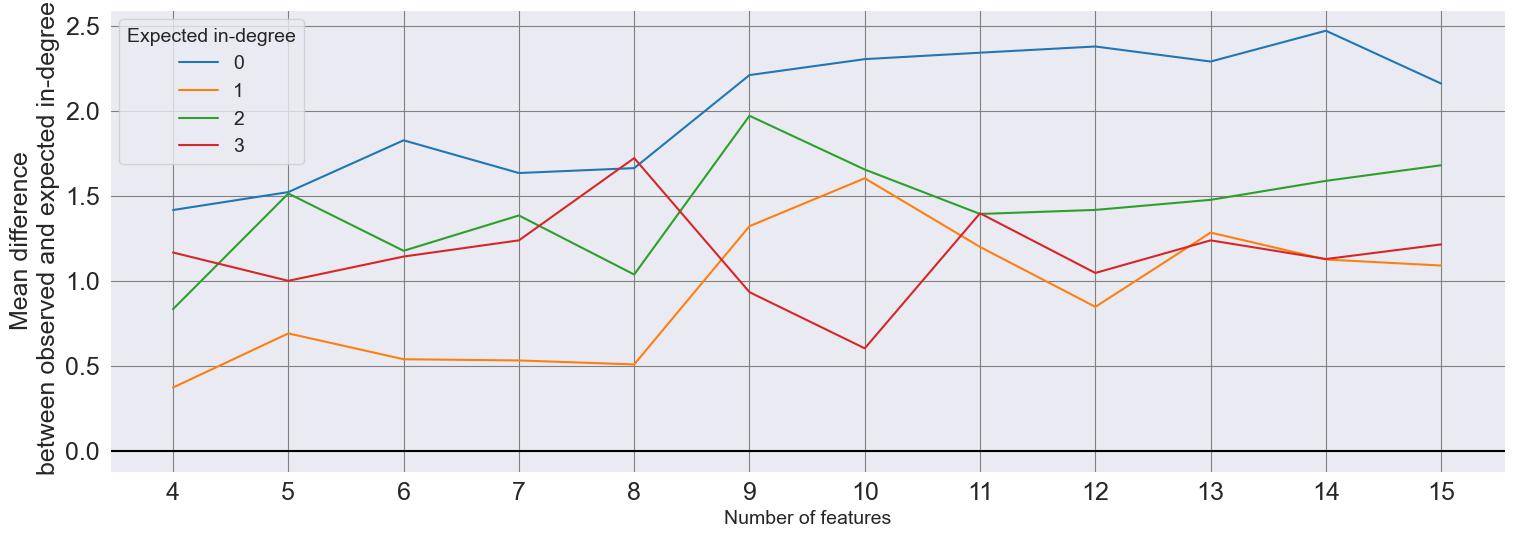

In [66]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

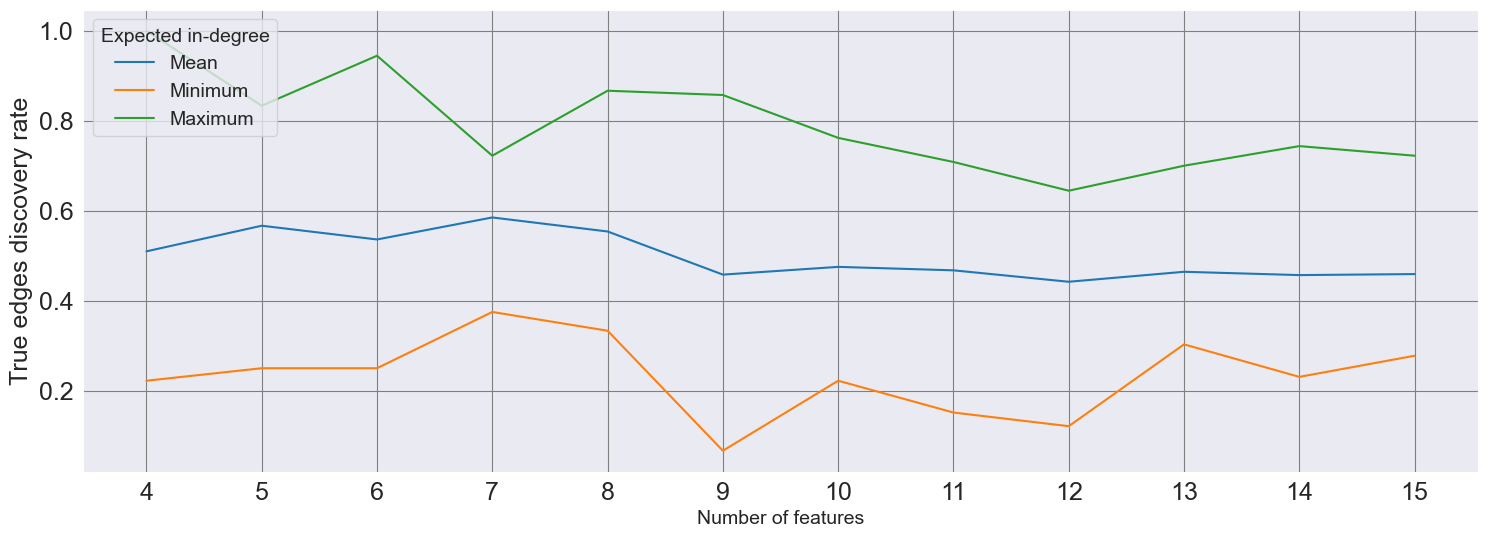

In [69]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

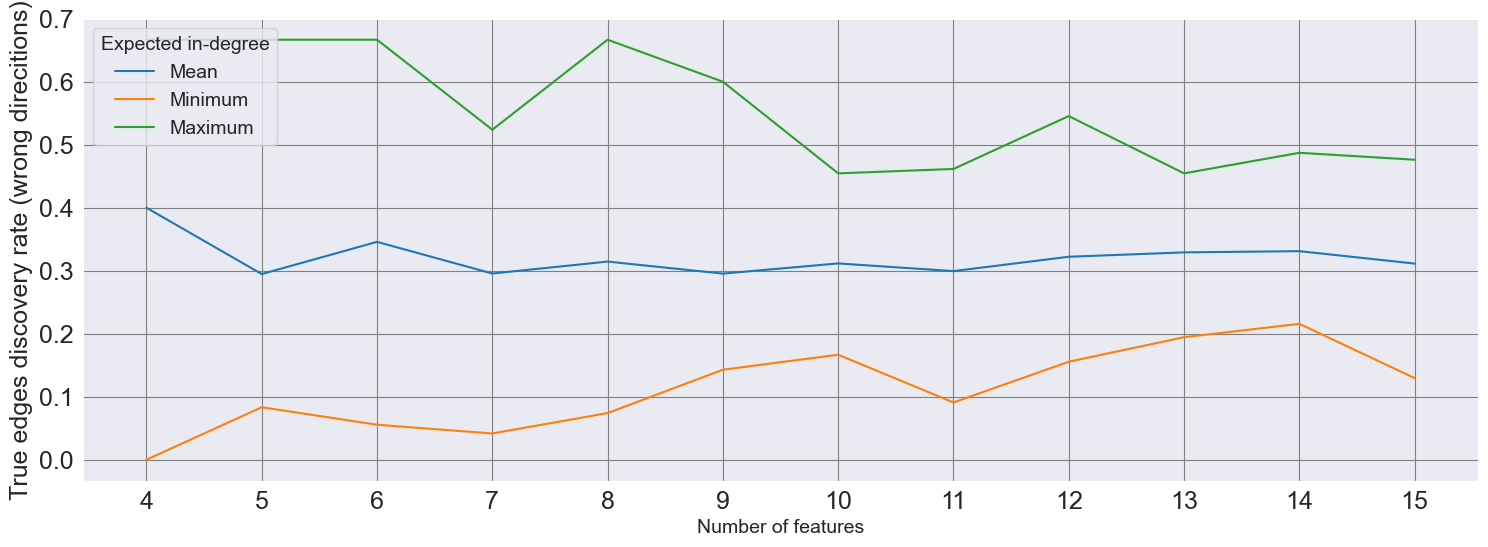

In [95]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

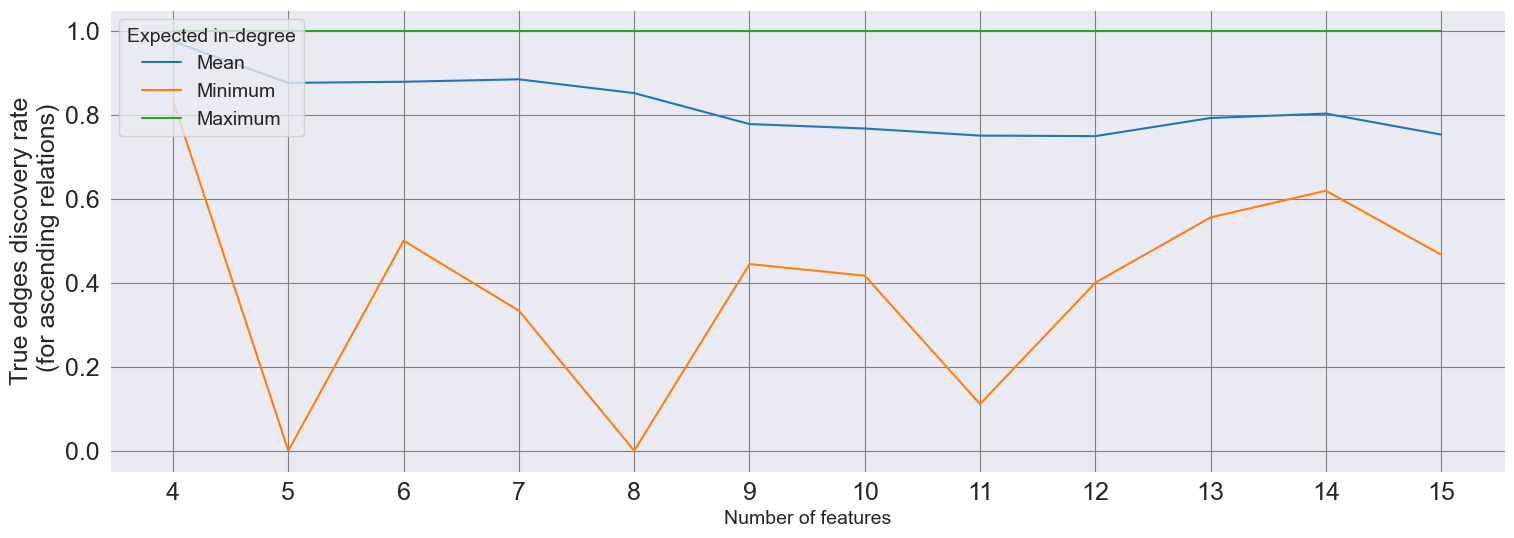

In [70]:
plot(['mean_asc', 'min_asc', 'max_asc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

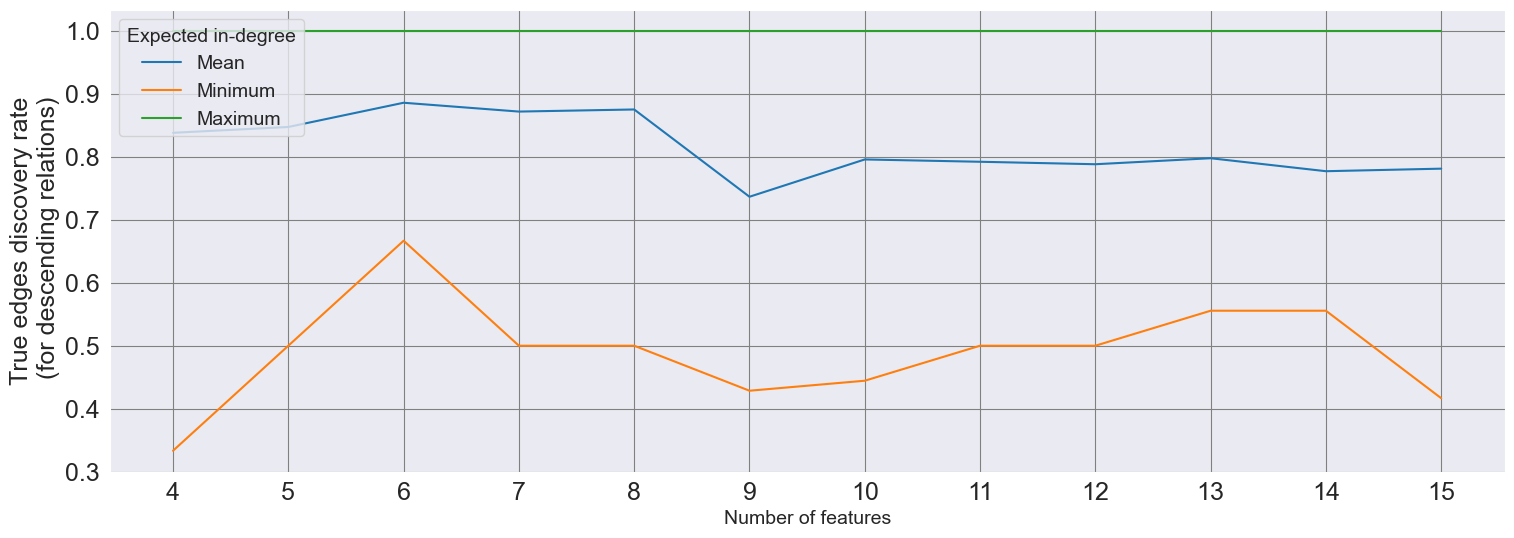

In [71]:
plot(['mean_desc', 'min_desc', 'max_desc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

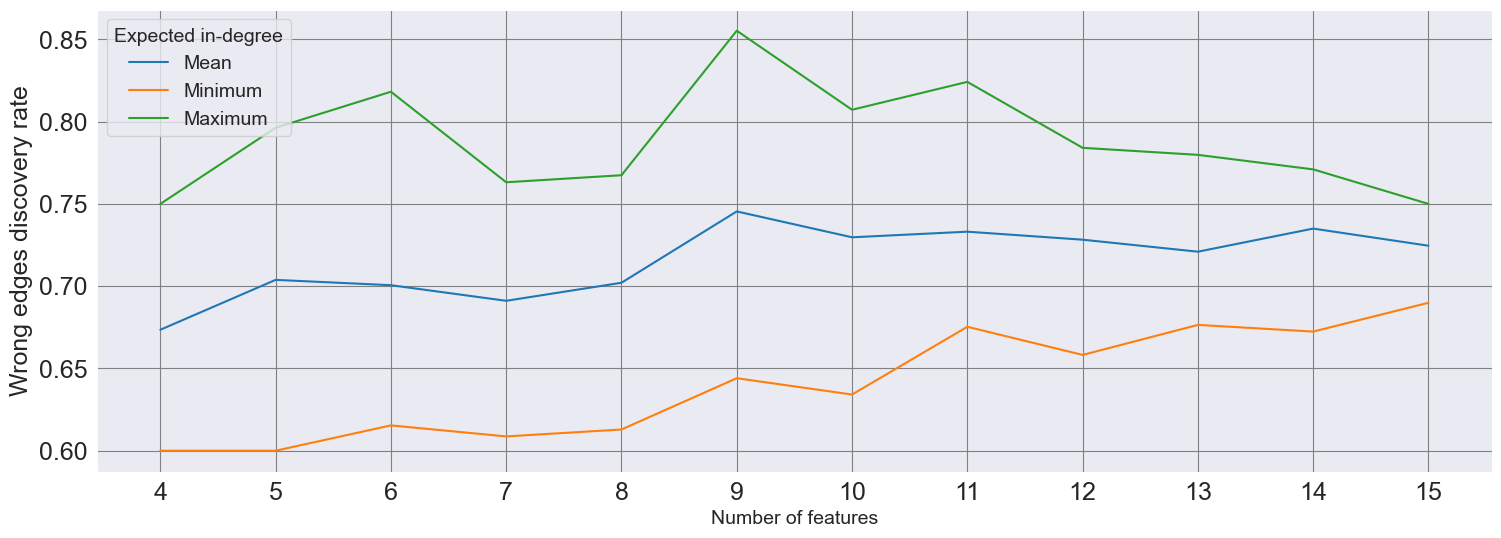

In [72]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

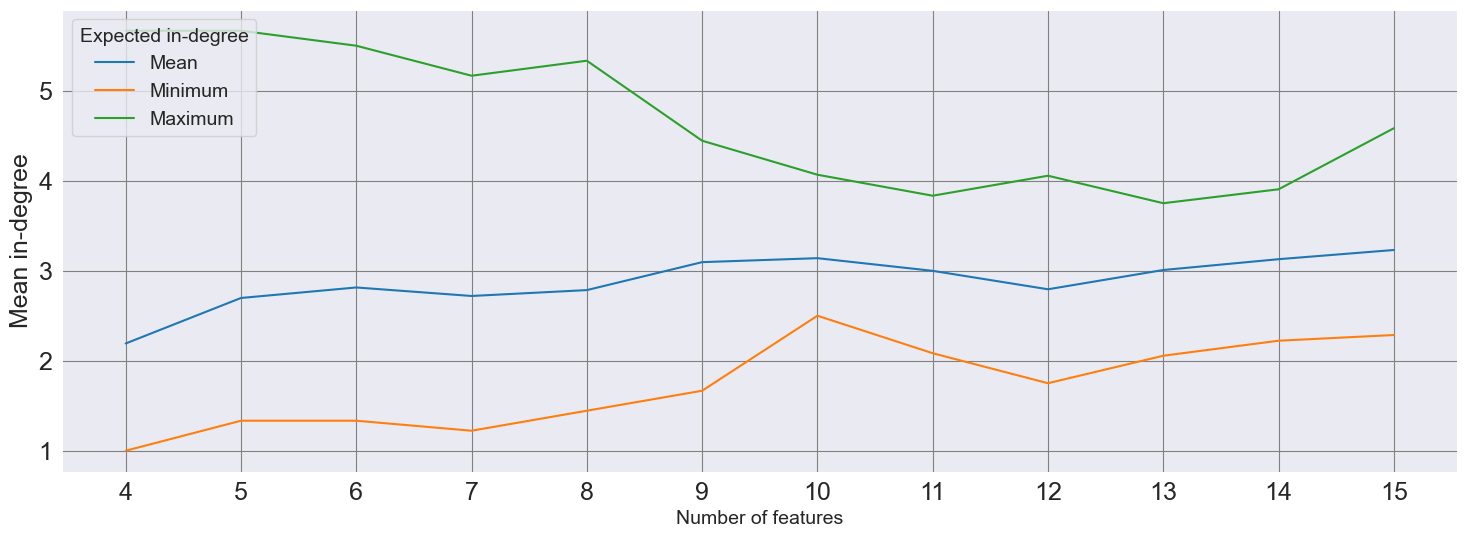

In [73]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [12]:
print(res.iloc[:, 18:23].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  indegree for actual 0 indegree &  indegree for actual 1 indegree &  indegree for actual 2 indegree &  indegree for actual 3 indegree &  indegree for actual 4 indegree \\
\midrule
0  &                        1.416667 &                        1.371795 &                        2.833333 &                        4.166667 &                            -inf \\
1  &                        1.522222 &                        1.690476 &                        3.513889 &                        4.000000 &                        3.833333 \\
2  &                        1.826944 &                        1.538462 &                        3.176768 &                        4.142857 &                        3.333333 \\
3  &                        1.634444 &                        1.531250 &                        3.384615 &                        4.238095 &                        4.750000 \\
4  &                        1.663333 &                        1.507937 &      

In [13]:
table1 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table1.append(ex3aux.simulation(i, scoring=("K2", K2Score), transitive_mode=True, construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [14]:
res1 = pd.DataFrame([table1[k] for k in range(12)], columns=cols)
res1

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.509722,0.222222,1.000000,0.400000,0.000000,0.666667,0.974359,0.833333,1.000000,0.837963,...,1.371795,2.833333,4.166667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.566667,0.250000,0.833333,0.294722,0.083333,0.666667,0.875817,0.000000,1.000000,0.847222,...,1.690476,3.513889,4.000000,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.536111,0.250000,0.944444,0.345833,0.055556,0.666667,0.878472,0.500000,1.000000,0.885673,...,1.538462,3.176768,4.142857,3.333333,4.666667,-inf,-inf,-inf,-inf,-inf
3,0.585040,0.375000,0.722222,0.295556,0.041667,0.523810,0.884259,0.333333,1.000000,0.871667,...,1.531250,3.384615,4.238095,4.750000,-inf,-inf,-inf,-inf,-inf,-inf
4,0.553856,0.333333,0.866667,0.314517,0.074074,0.666667,0.851462,0.000000,1.000000,0.875000,...,1.507937,3.037037,4.722222,5.000000,5.000000,-inf,-inf,-inf,-inf,-inf
5,0.352597,0.095238,0.851852,0.296870,0.111111,0.666667,0.669974,0.333333,1.000000,0.634066,...,2.530117,4.006481,3.600000,3.533333,-inf,-inf,-inf,-inf,-inf,-inf
6,0.396326,0.192982,0.666667,0.290408,0.150000,0.462963,0.712070,0.481481,1.000000,0.680203,...,2.767251,3.482456,3.974359,3.333333,5.000000,-inf,-inf,-inf,-inf,-inf
7,0.395202,0.166667,0.555556,0.275219,0.116667,0.404762,0.692592,0.370370,1.000000,0.658513,...,2.198333,3.623457,4.440171,4.166667,-inf,-inf,-inf,-inf,-inf,-inf
8,0.367415,0.087719,0.615385,0.266505,0.133333,0.403509,0.593403,0.285714,0.888889,0.668130,...,2.187963,3.643519,4.379630,3.700000,2.000000,5.0,-inf,-inf,-inf,-inf
9,0.375373,0.185185,0.644444,0.294257,0.126984,0.500000,0.657426,0.515152,0.952381,0.697603,...,2.428611,3.535088,4.273810,3.888889,5.000000,-inf,-inf,-inf,-inf,-inf


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0')])

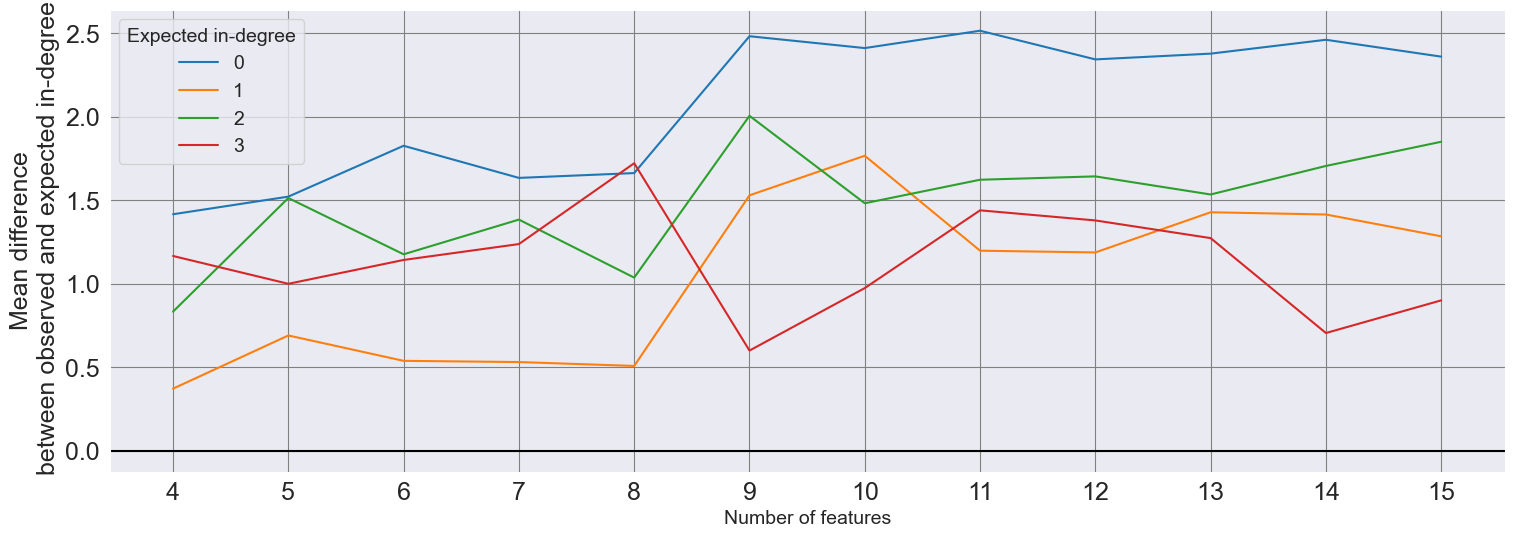

In [74]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res1[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

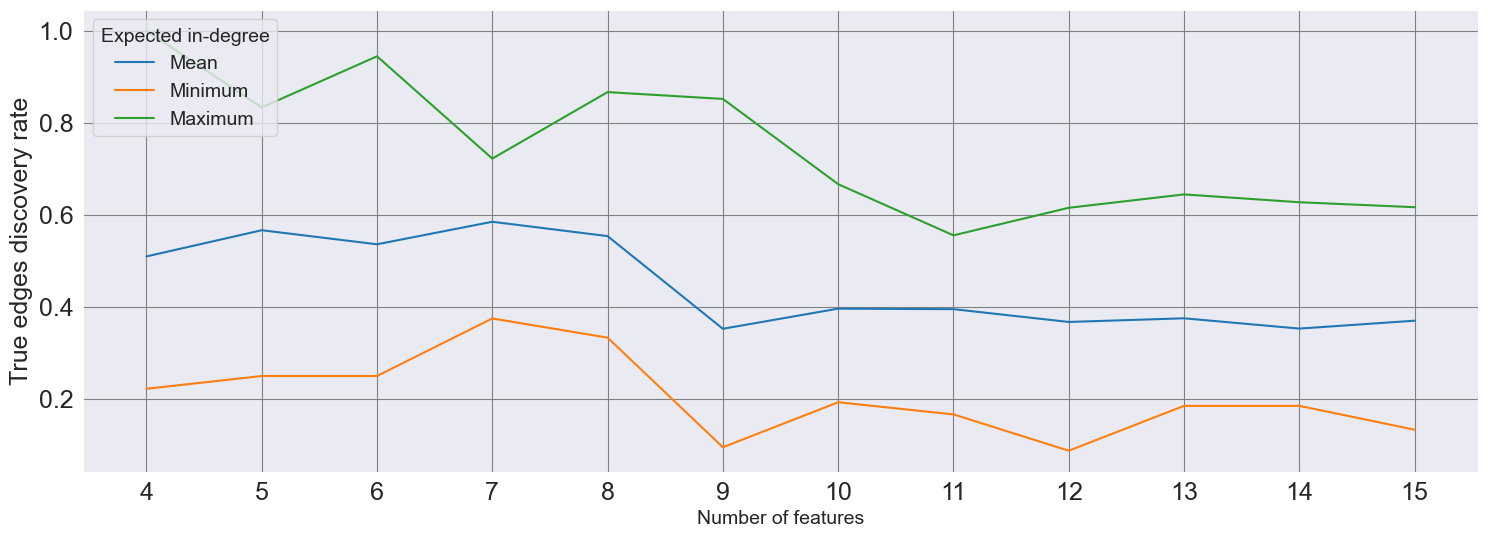

In [75]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

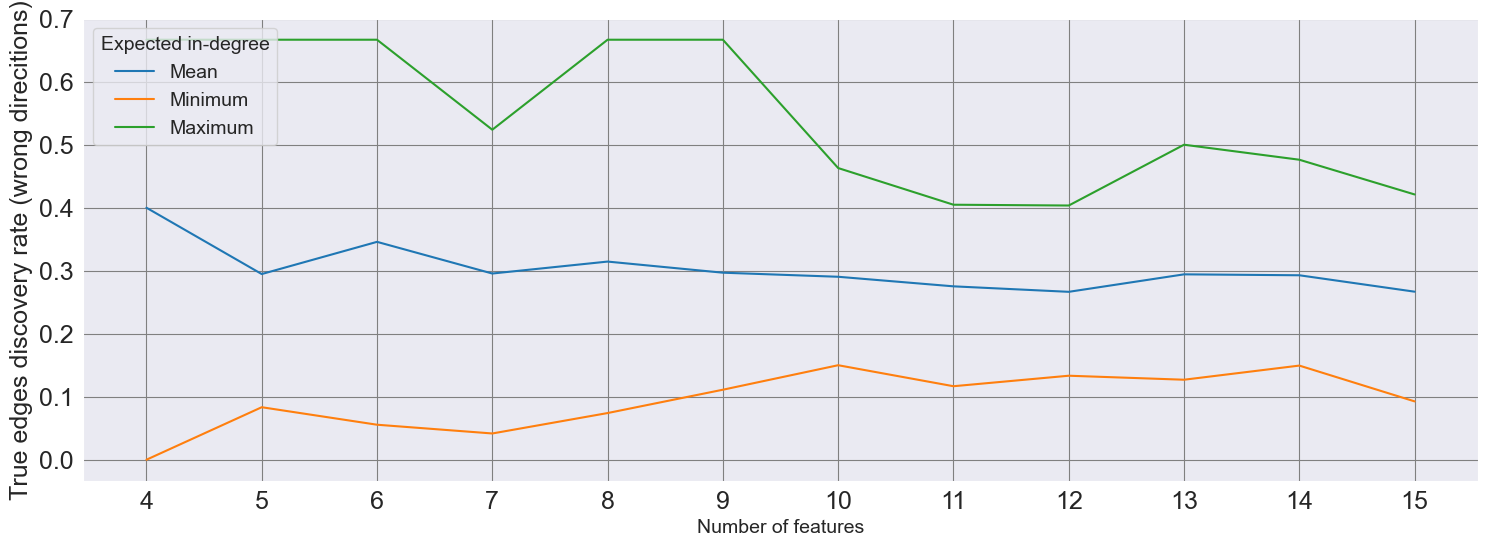

In [76]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

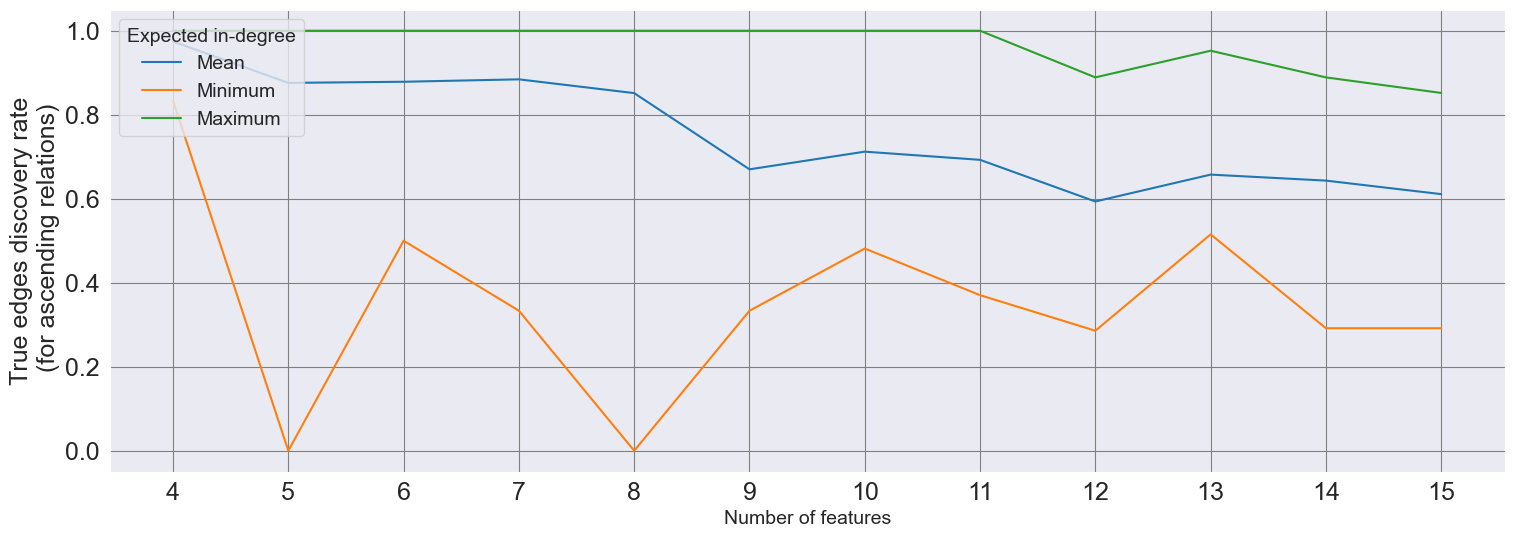

In [77]:
plot(['mean_asc', 'min_asc', 'max_asc'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

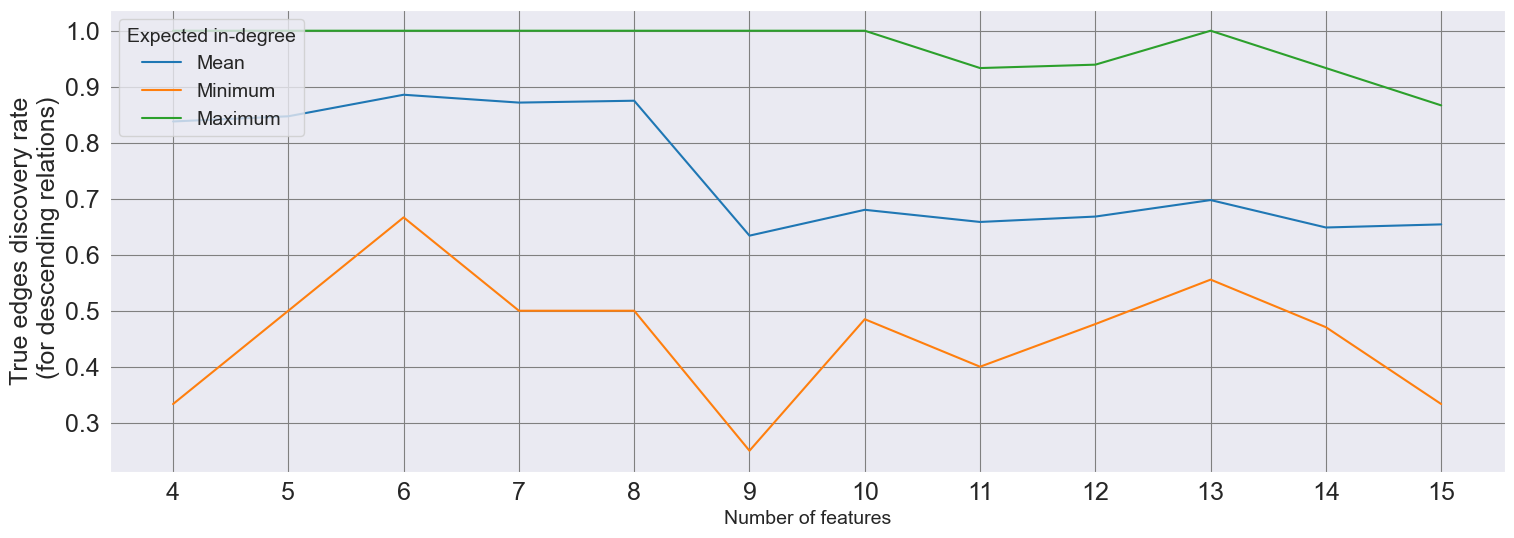

In [78]:
plot(['mean_desc', 'min_desc', 'max_desc'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

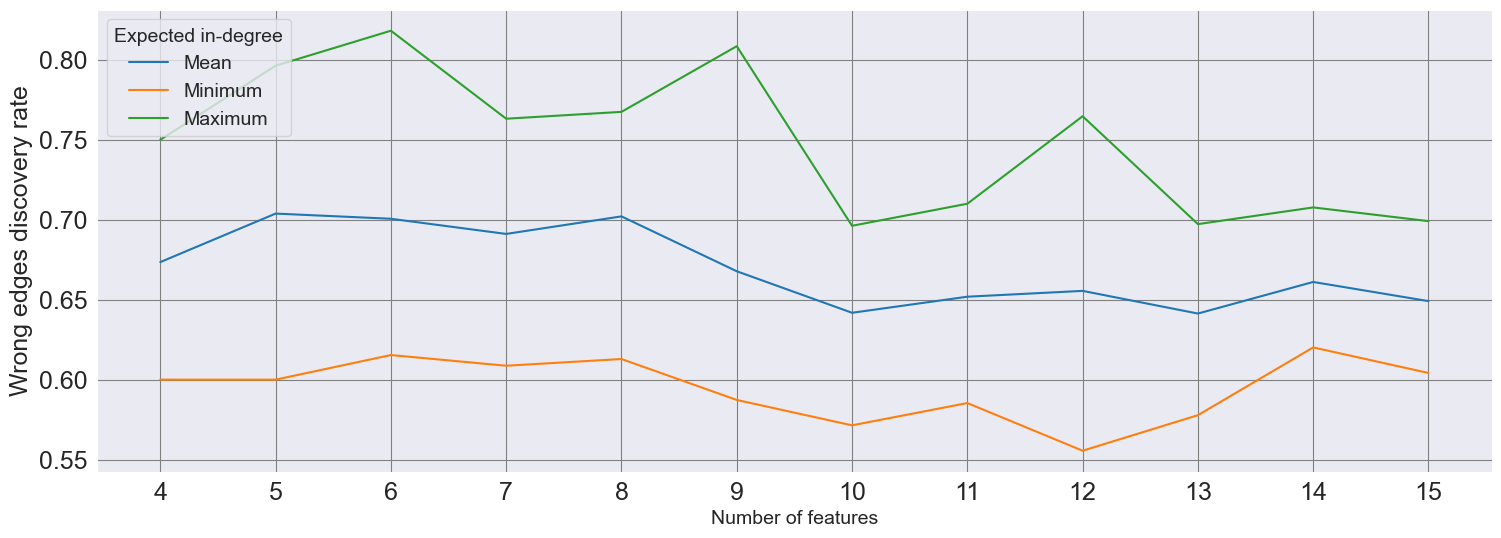

In [79]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res1, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

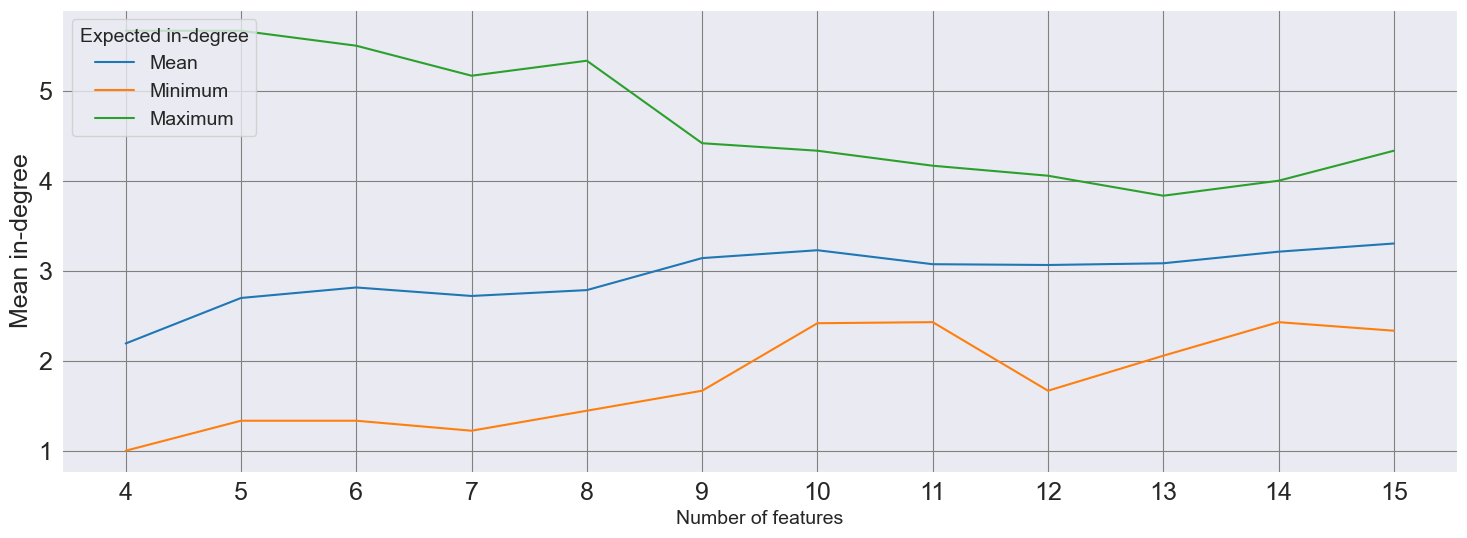

In [80]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res1, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [21]:
table2 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table2.append(ex3aux.simulation(i, scoring=("K2", BicScore), construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [22]:
res2 = pd.DataFrame([table2[k] for k in range(12)], columns=cols)
res2

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.493056,0.000000,1.000000,0.394444,0.000000,1.000000,0.961538,0.666667,1.000000,0.799383,...,1.410256,2.020833,2.333333,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.574444,0.111111,1.000000,0.283333,0.000000,0.555556,0.875817,0.000000,1.000000,0.843889,...,1.547619,2.513889,3.000000,2.500000,-inf,-inf,-inf,-inf,-inf,-inf
2,0.513016,0.166667,0.833333,0.333413,0.000000,0.833333,0.827778,0.333333,1.000000,0.850585,...,1.243590,2.595960,3.404762,2.000000,3.333333,-inf,-inf,-inf,-inf,-inf
3,0.541290,0.333333,0.916667,0.327877,0.083333,0.555556,0.850309,0.000000,1.000000,0.864722,...,1.331597,3.012821,3.095238,3.583333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.582130,0.300000,1.000000,0.256276,0.000000,0.500000,0.828655,0.000000,1.000000,0.842500,...,1.474206,2.648148,3.222222,2.666667,2.916667,-inf,-inf,-inf,-inf,-inf
5,0.444698,0.185185,0.791667,0.260316,0.083333,0.611111,0.721389,0.333333,1.000000,0.682857,...,1.765205,2.957407,2.983333,2.466667,-inf,-inf,-inf,-inf,-inf,-inf
6,0.464554,0.222222,0.694444,0.282680,0.083333,0.428571,0.746389,0.333333,1.000000,0.744623,...,1.980702,2.679825,2.820513,2.000000,3.666667,-inf,-inf,-inf,-inf,-inf
7,0.441838,0.151515,0.703704,0.281040,0.090909,0.566667,0.710556,0.166667,1.000000,0.751151,...,1.776944,2.813272,2.829060,2.833333,-inf,-inf,-inf,-inf,-inf,-inf
8,0.406260,0.060606,0.733333,0.307035,0.102564,0.545455,0.686508,0.333333,1.000000,0.745456,...,1.787037,2.503086,2.791667,2.566667,3.000000,4.0,-inf,-inf,-inf,-inf
9,0.422239,0.142857,0.700000,0.325142,0.128205,0.484848,0.734504,0.388889,1.000000,0.754427,...,1.923333,2.707602,2.821429,3.333333,3.666667,-inf,-inf,-inf,-inf,-inf


In [23]:
print(res2.iloc[:, 18:23].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  indegree for actual 0 indegree &  indegree for actual 1 indegree &  indegree for actual 2 indegree &  indegree for actual 3 indegree &  indegree for actual 4 indegree \\
\midrule
0  &                        1.386111 &                        1.410256 &                        2.020833 &                        2.333333 &                            -inf \\
1  &                        1.419444 &                        1.547619 &                        2.513889 &                        3.000000 &                        2.500000 \\
2  &                        1.397500 &                        1.243590 &                        2.595960 &                        3.404762 &                        2.000000 \\
3  &                        1.484167 &                        1.331597 &                        3.012821 &                        3.095238 &                        3.583333 \\
4  &                        1.350278 &                        1.474206 &      

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

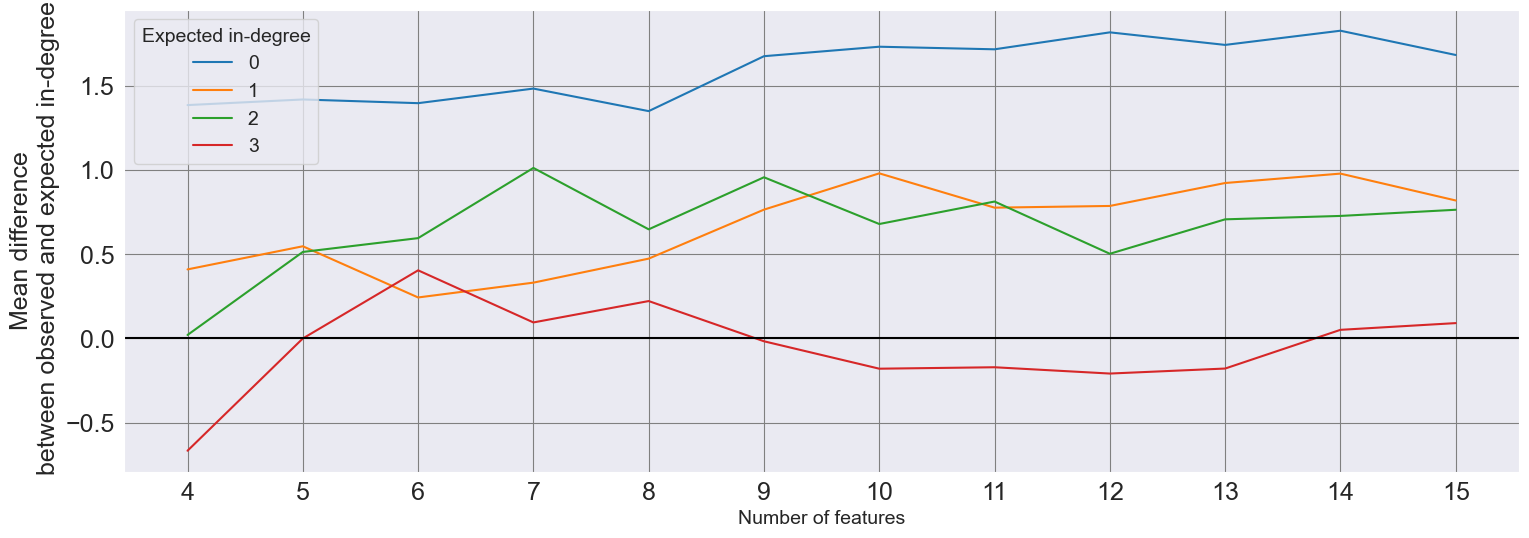

In [81]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res2[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

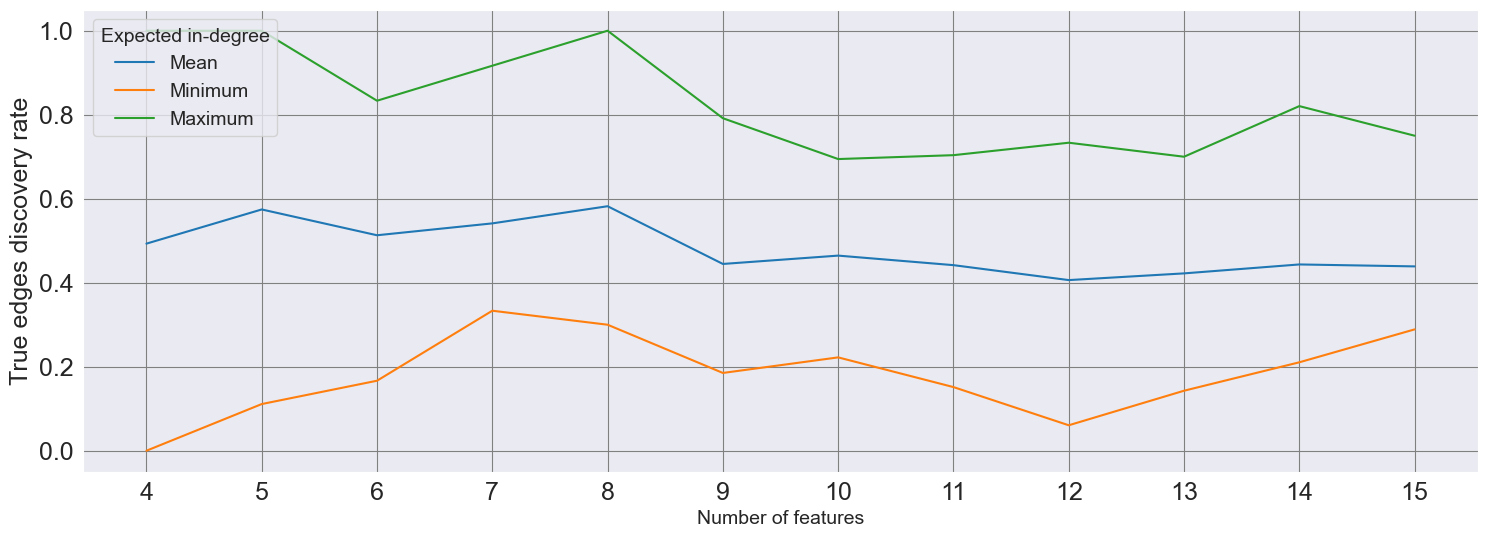

In [82]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

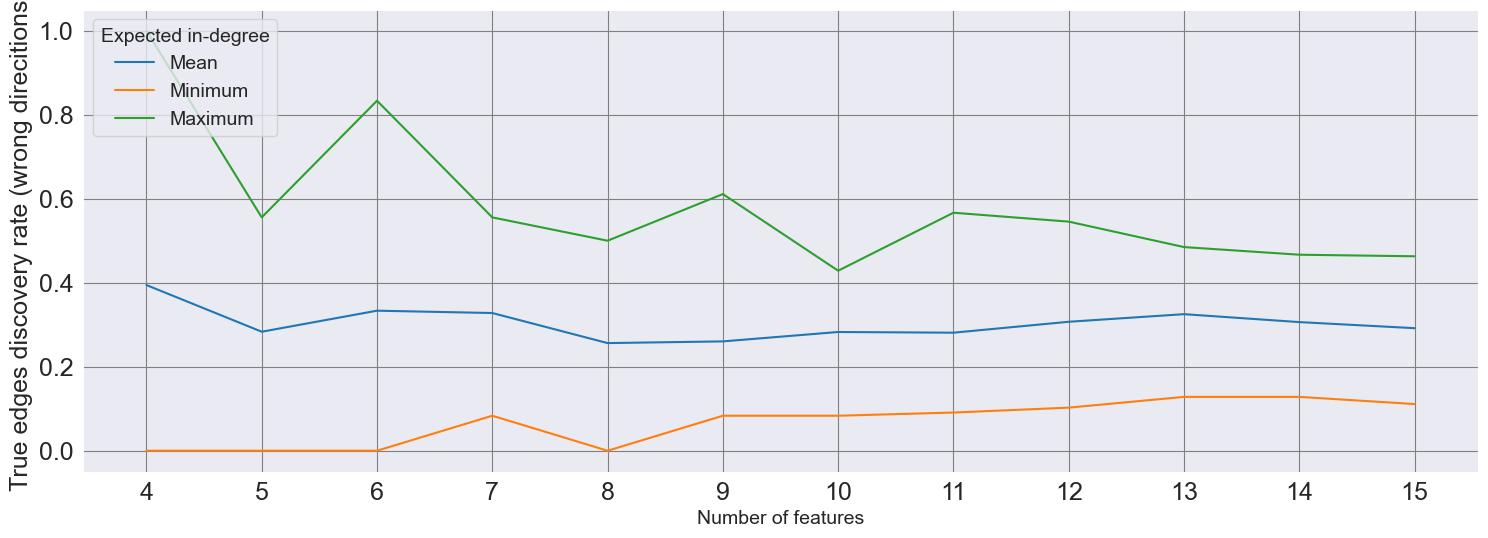

In [83]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

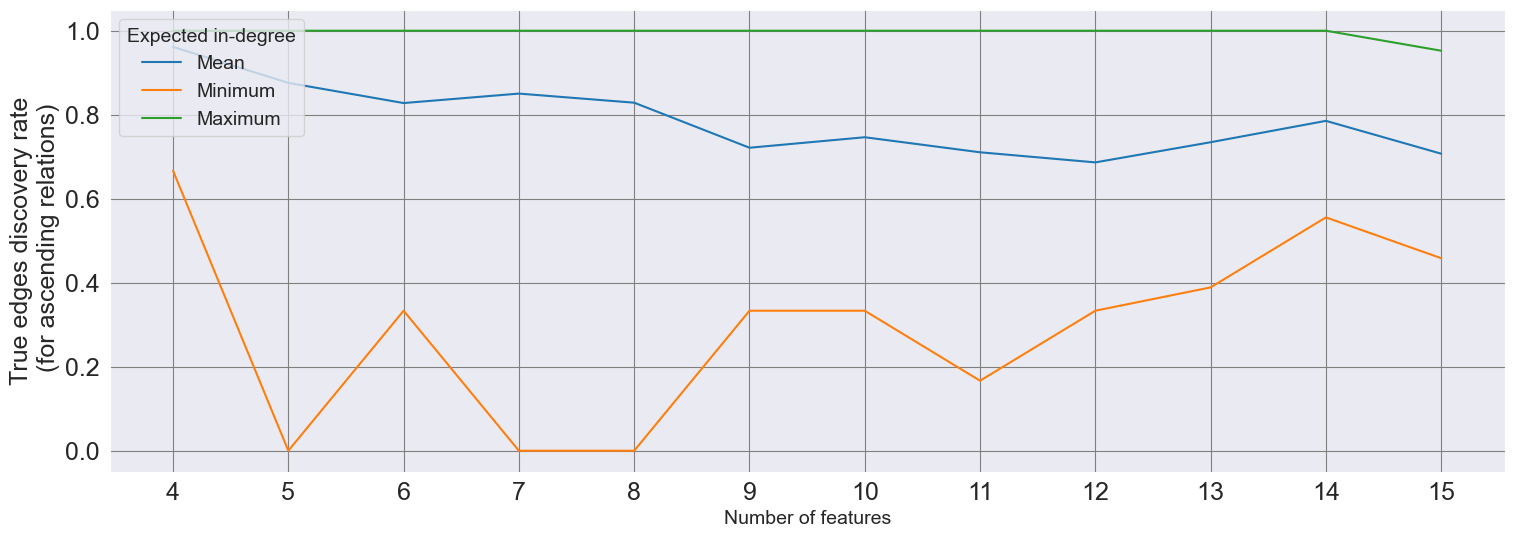

In [84]:
plot(['mean_asc', 'min_asc', 'max_asc'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

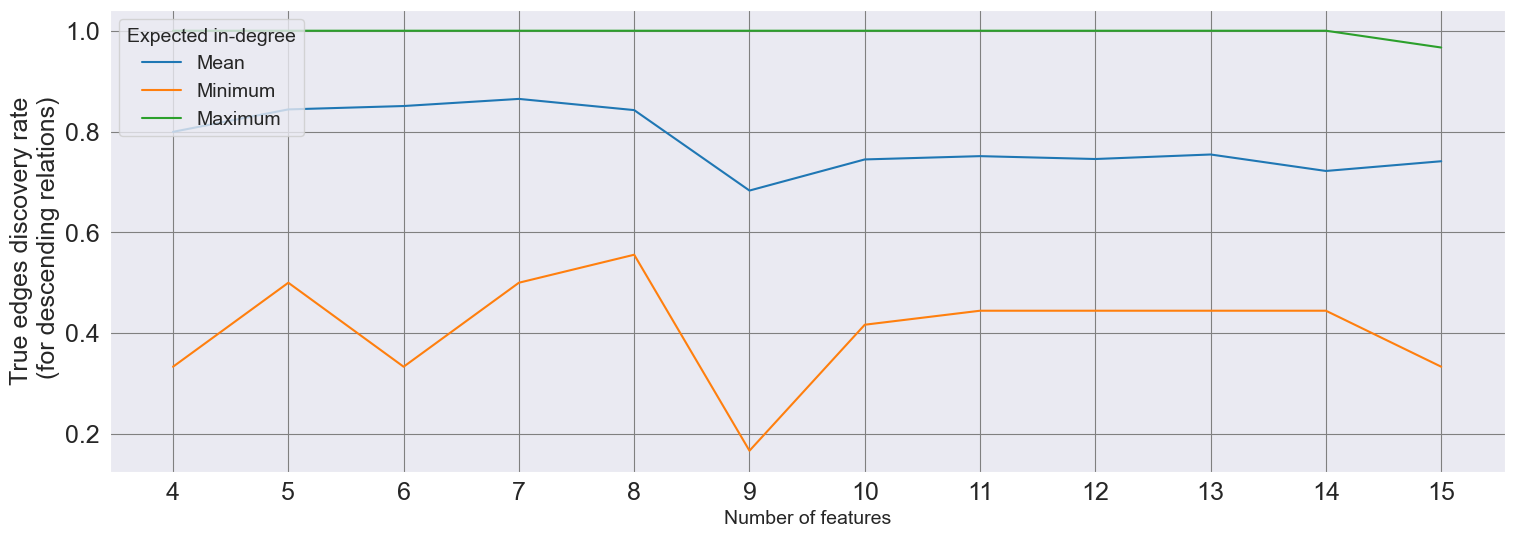

In [85]:
plot(['mean_desc', 'min_desc', 'max_desc'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

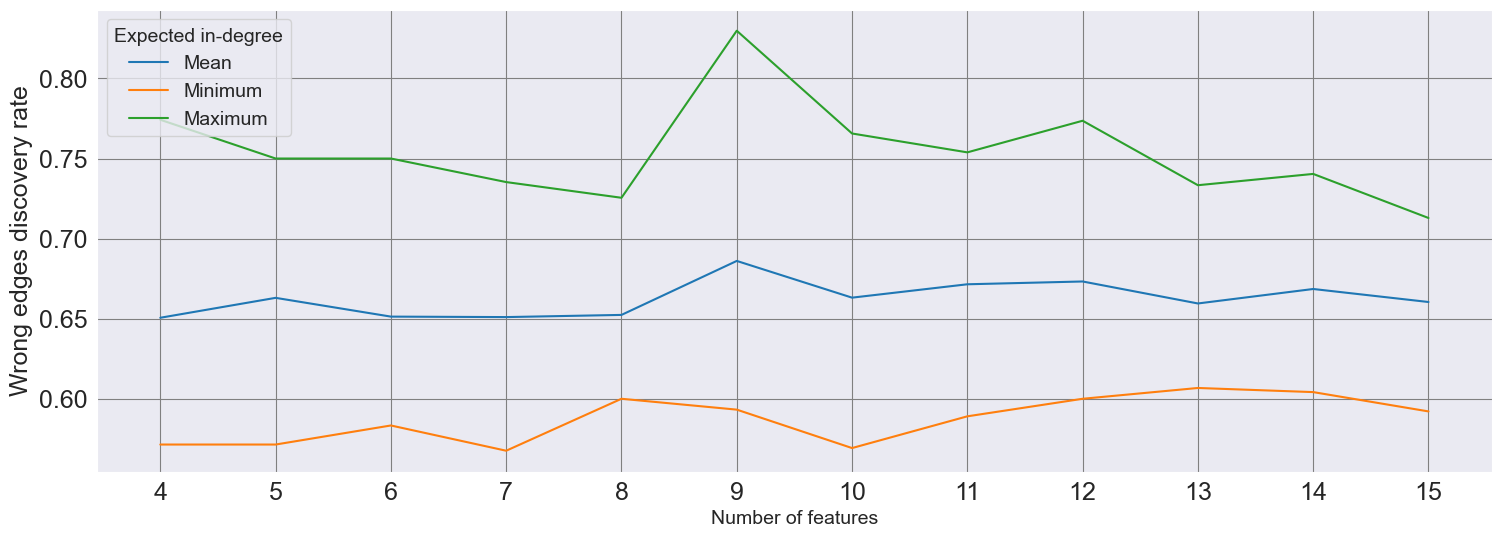

In [86]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res2, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

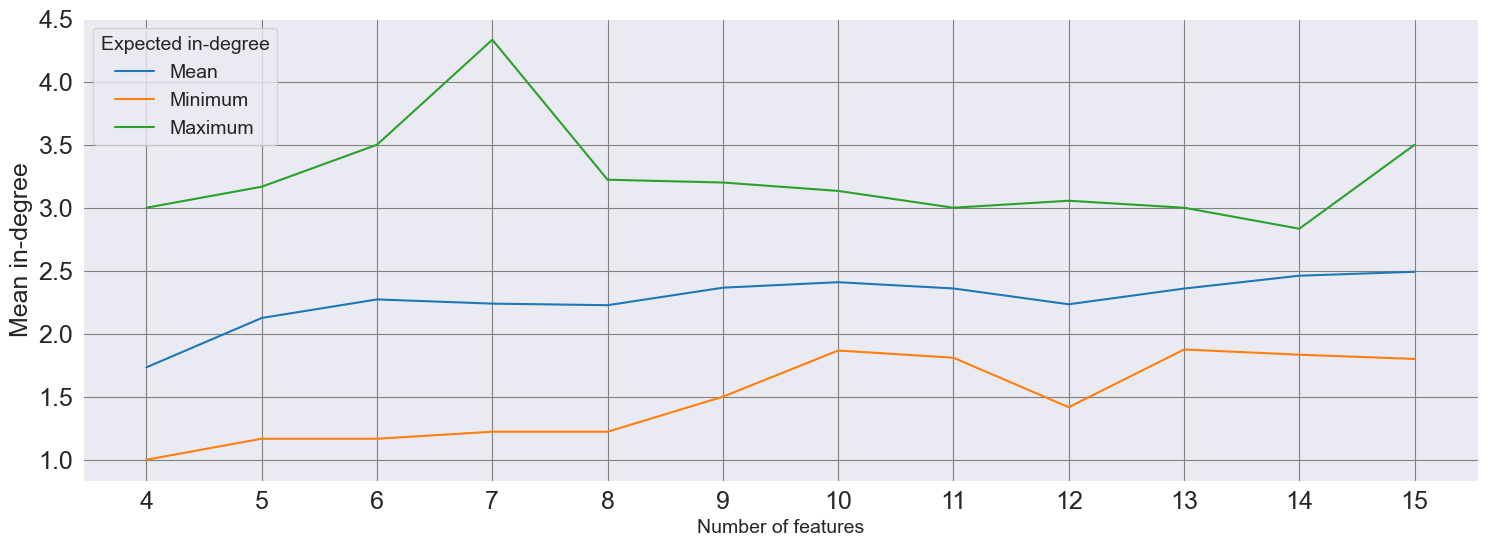

In [87]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res2, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [30]:
table3 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table3.append(ex3aux.simulation(i, scoring=("K2", BicScore), transitive_mode=True, construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [31]:
res3 = pd.DataFrame([table3[k] for k in range(12)], columns=cols)
res3

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.493056,0.000000,1.000000,0.394444,0.000000,1.000000,0.961538,0.666667,1.000000,0.799383,...,1.410256,2.020833,2.333333,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.574444,0.111111,1.000000,0.283333,0.000000,0.555556,0.875817,0.000000,1.000000,0.843889,...,1.547619,2.513889,3.000000,2.500000,-inf,-inf,-inf,-inf,-inf,-inf
2,0.513016,0.166667,0.833333,0.333413,0.000000,0.833333,0.827778,0.333333,1.000000,0.850585,...,1.243590,2.595960,3.404762,2.000000,3.333333,-inf,-inf,-inf,-inf,-inf
3,0.541290,0.333333,0.916667,0.327877,0.083333,0.555556,0.850309,0.000000,1.000000,0.864722,...,1.331597,3.012821,3.095238,3.583333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.582130,0.300000,1.000000,0.256276,0.000000,0.500000,0.828655,0.000000,1.000000,0.842500,...,1.474206,2.648148,3.222222,2.666667,2.916667,-inf,-inf,-inf,-inf,-inf
5,0.340425,0.000000,0.814815,0.229776,0.047619,0.466667,0.571362,0.000000,1.000000,0.567318,...,1.934503,2.930556,3.150000,2.600000,-inf,-inf,-inf,-inf,-inf,-inf
6,0.350553,0.140351,0.555556,0.236014,0.083333,0.370370,0.617427,0.366667,1.000000,0.575539,...,2.089474,2.774854,2.807692,2.000000,3.333333,-inf,-inf,-inf,-inf,-inf
7,0.328779,0.133333,0.488889,0.244646,0.100000,0.388889,0.566891,0.185185,1.000000,0.588027,...,1.950833,2.776235,2.649573,2.791667,-inf,-inf,-inf,-inf,-inf,-inf
8,0.305958,0.066667,0.666667,0.246435,0.055556,0.377778,0.492099,0.185185,0.666667,0.600020,...,1.932672,2.647531,2.824074,2.333333,2.333333,4.0,-inf,-inf,-inf,-inf
9,0.328744,0.115942,0.521739,0.250398,0.117647,0.370370,0.562245,0.363636,0.904762,0.602960,...,2.046944,2.713450,2.857143,2.777778,3.666667,-inf,-inf,-inf,-inf,-inf


(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

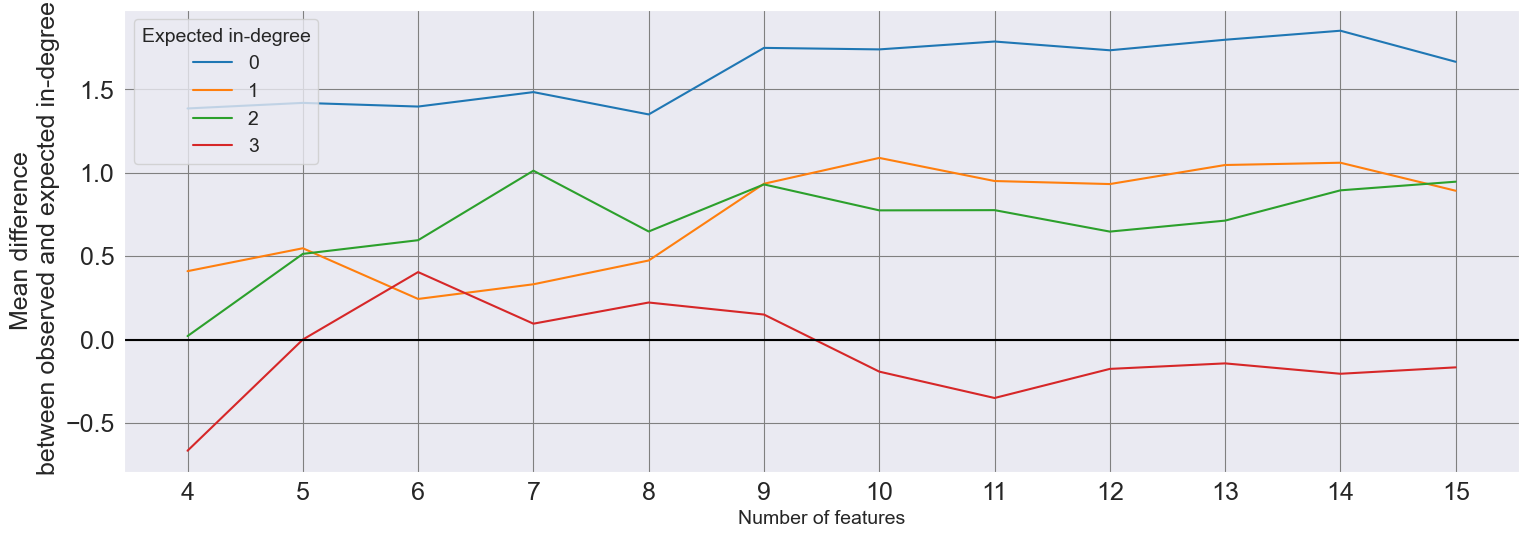

In [88]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res3[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree", fontsize=18)
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x, fontsize=18)
plt.yticks(fontsize=18)

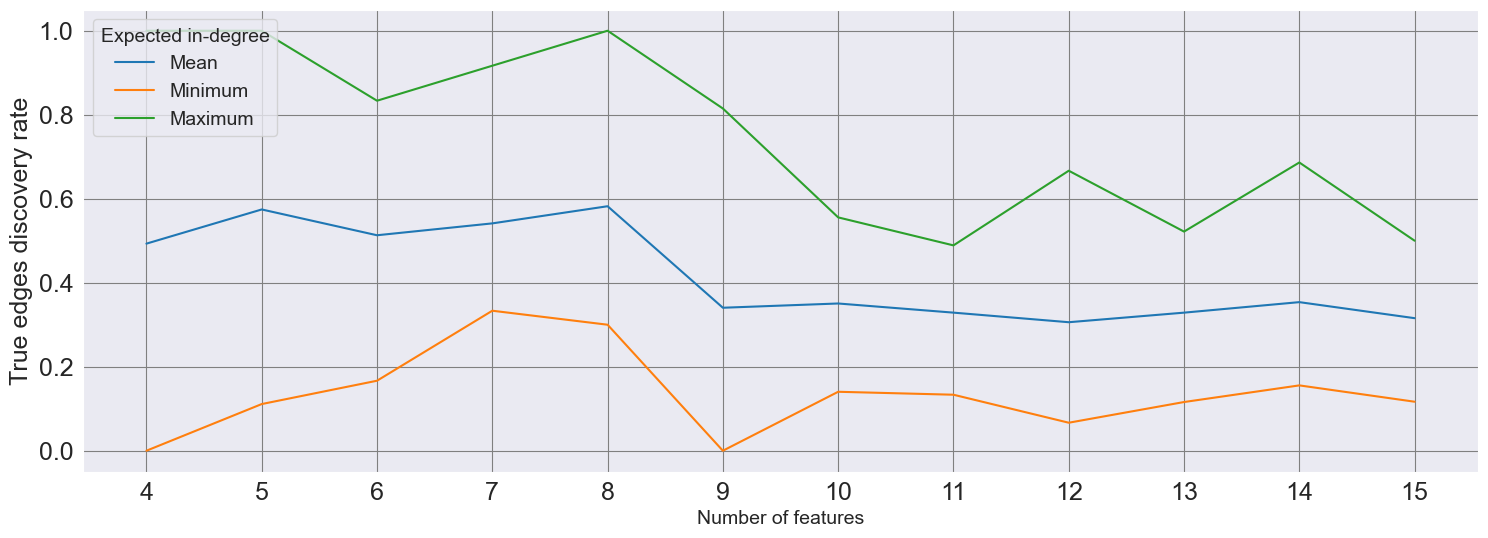

In [89]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

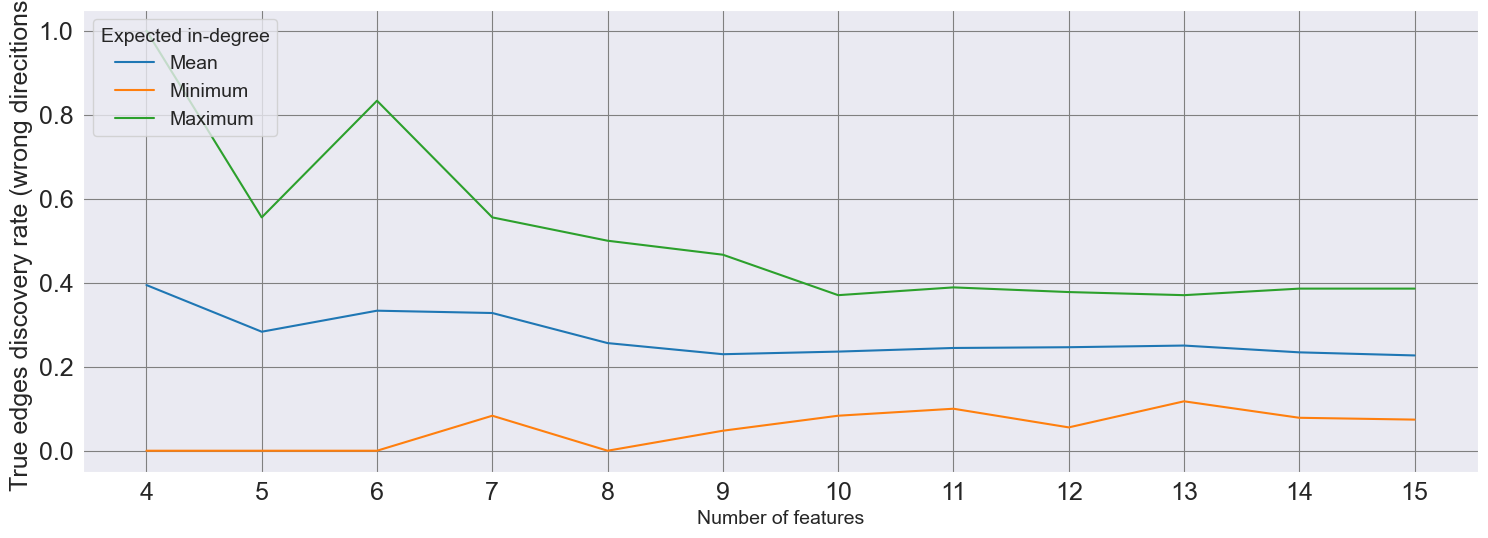

In [90]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

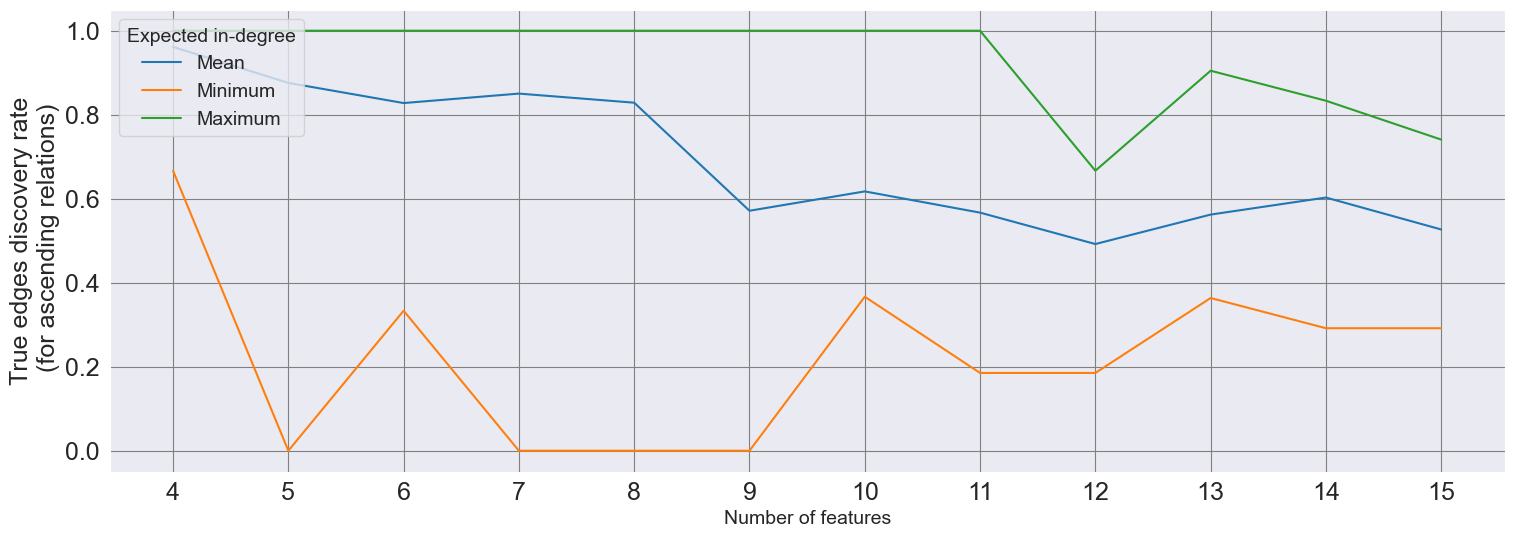

In [91]:
plot(['mean_asc', 'min_asc', 'max_asc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

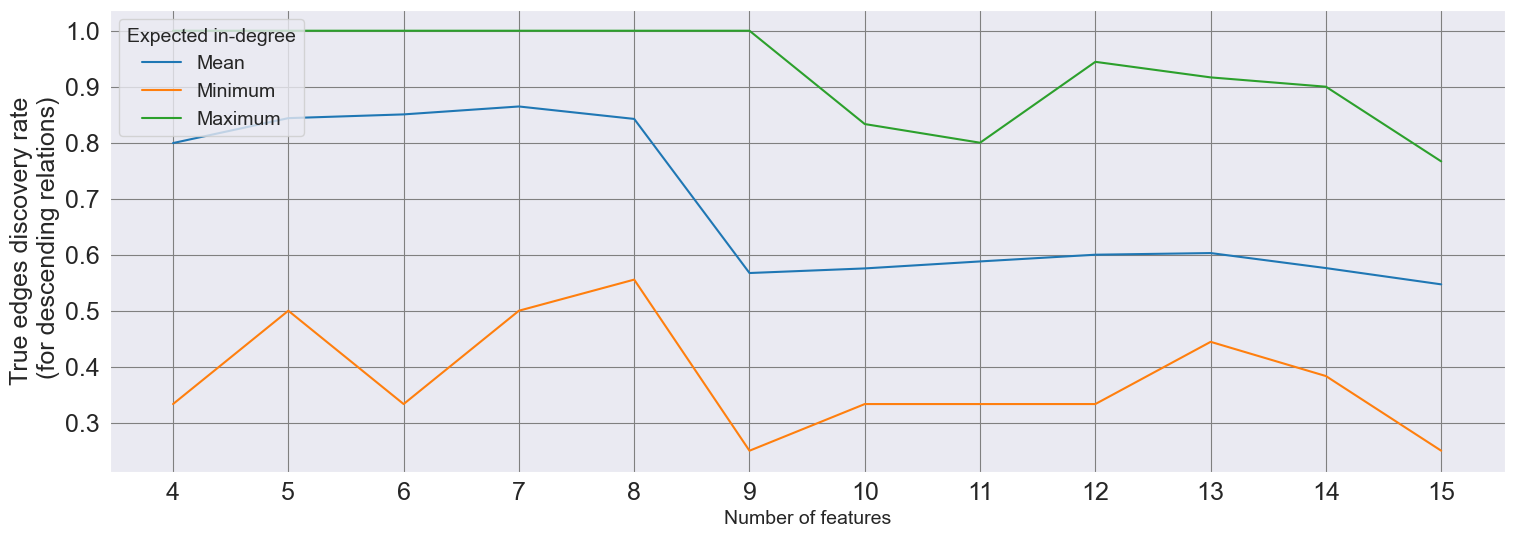

In [92]:
plot(['mean_desc', 'min_desc', 'max_desc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

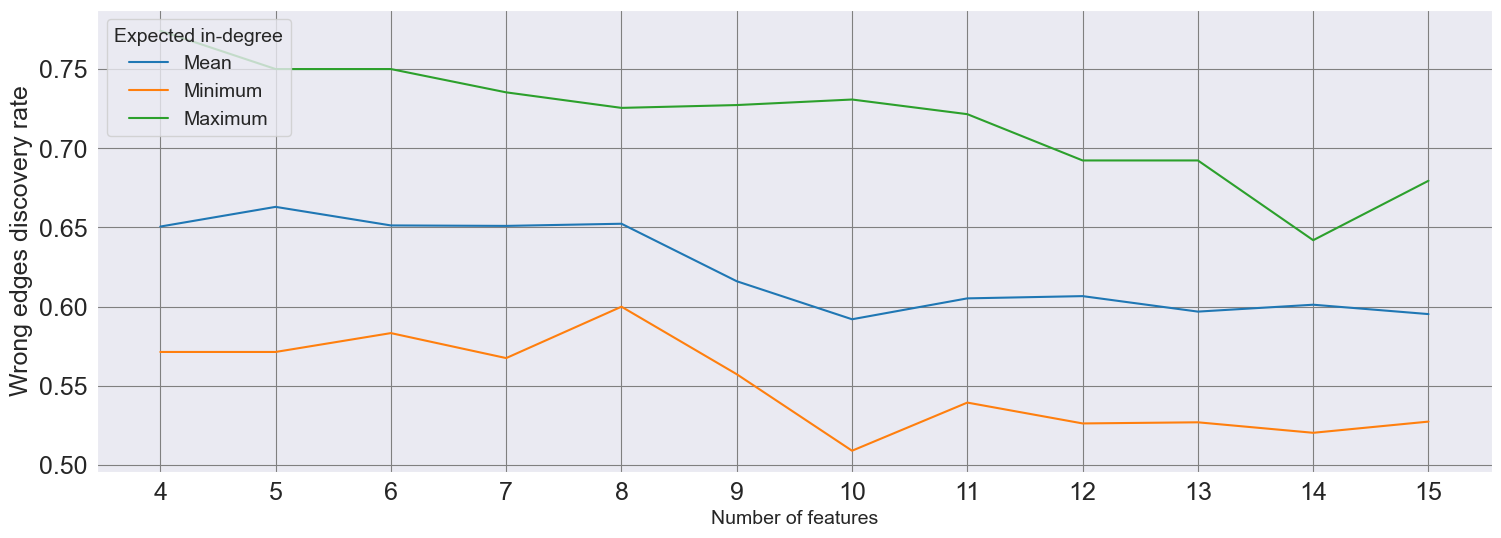

In [93]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res3, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

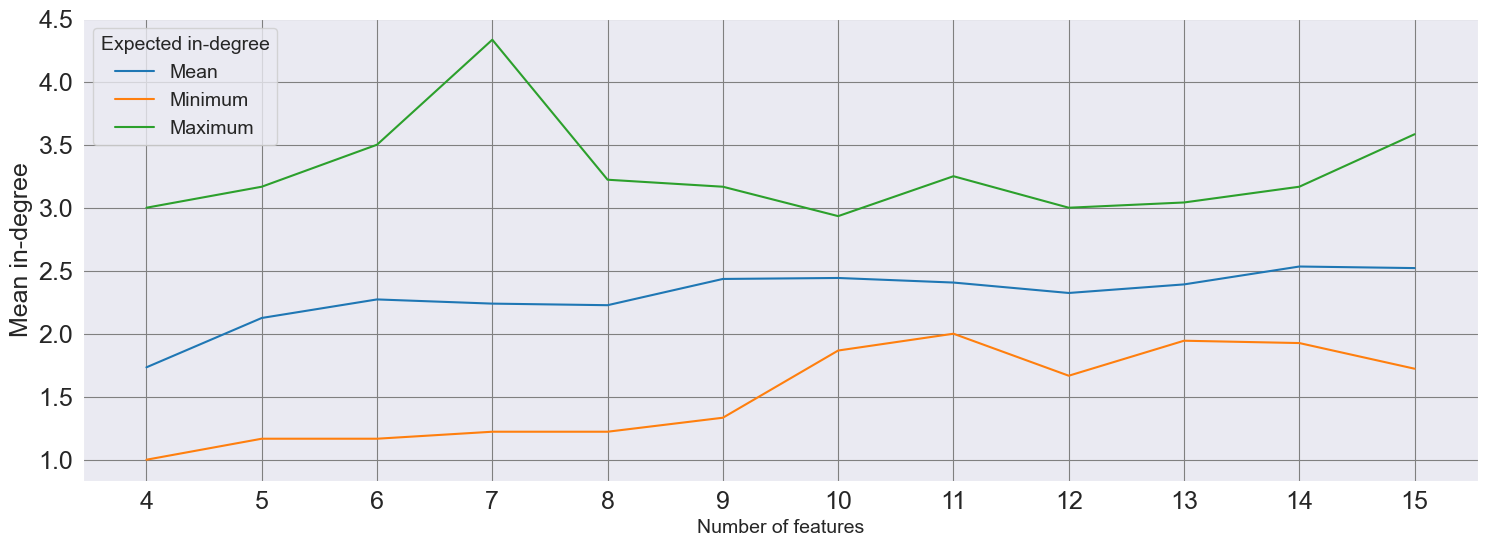

In [94]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res3, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [38]:
table4 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table4.append(ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_uniform))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [52]:
res4 = pd.DataFrame([table4[k] for k in range(12)], columns=cols)
res4

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.470833,0.083333,0.833333,0.390278,0.166667,0.666667,0.910256,0.666667,1.000000,0.807099,...,1.448718,2.458333,3.333333,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.540833,0.222222,0.833333,0.342500,0.083333,0.666667,0.901961,0.000000,1.000000,0.875000,...,1.559524,3.013889,3.777778,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.527817,0.250000,0.750000,0.328095,0.055556,0.500000,0.856250,0.333333,1.000000,0.858772,...,1.525641,3.141414,4.309524,3.000000,4.333333,-inf,-inf,-inf,-inf,-inf
3,0.558651,0.266667,0.933333,0.292996,0.066667,0.555556,0.851235,0.000000,1.000000,0.841111,...,1.399306,3.487179,3.809524,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.533571,0.250000,0.800000,0.319616,0.166667,0.555556,0.836257,0.000000,1.000000,0.866111,...,1.279762,2.868056,4.722222,3.666667,4.666667,-inf,-inf,-inf,-inf,-inf
5,0.389473,0.208333,0.619048,0.326769,0.166667,0.555556,0.751667,0.333333,1.000000,0.678968,...,1.996199,3.521296,4.016667,3.600000,-inf,-inf,-inf,-inf,-inf,-inf
6,0.426161,0.190476,0.714286,0.333517,0.151515,0.571429,0.742500,0.416667,1.000000,0.775060,...,2.381871,3.624269,3.410256,2.666667,8.000000,-inf,-inf,-inf,-inf,-inf
7,0.446759,0.181818,0.708333,0.292673,0.181818,0.476190,0.718333,0.333333,1.000000,0.767956,...,2.140833,3.842593,3.991453,3.625000,-inf,-inf,-inf,-inf,-inf,-inf
8,0.422293,0.151515,0.766667,0.305210,0.166667,0.571429,0.716349,0.400000,1.000000,0.747163,...,2.039286,3.286728,4.013889,3.366667,3.000000,6.0,-inf,-inf,-inf,-inf
9,0.392219,0.181818,0.629630,0.352534,0.190476,0.545455,0.756171,0.500000,1.000000,0.751337,...,2.285556,3.257310,3.547619,4.444444,5.666667,-inf,-inf,-inf,-inf,-inf


([<matplotlib.axis.XTick at 0x1c883583310>,
 [Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

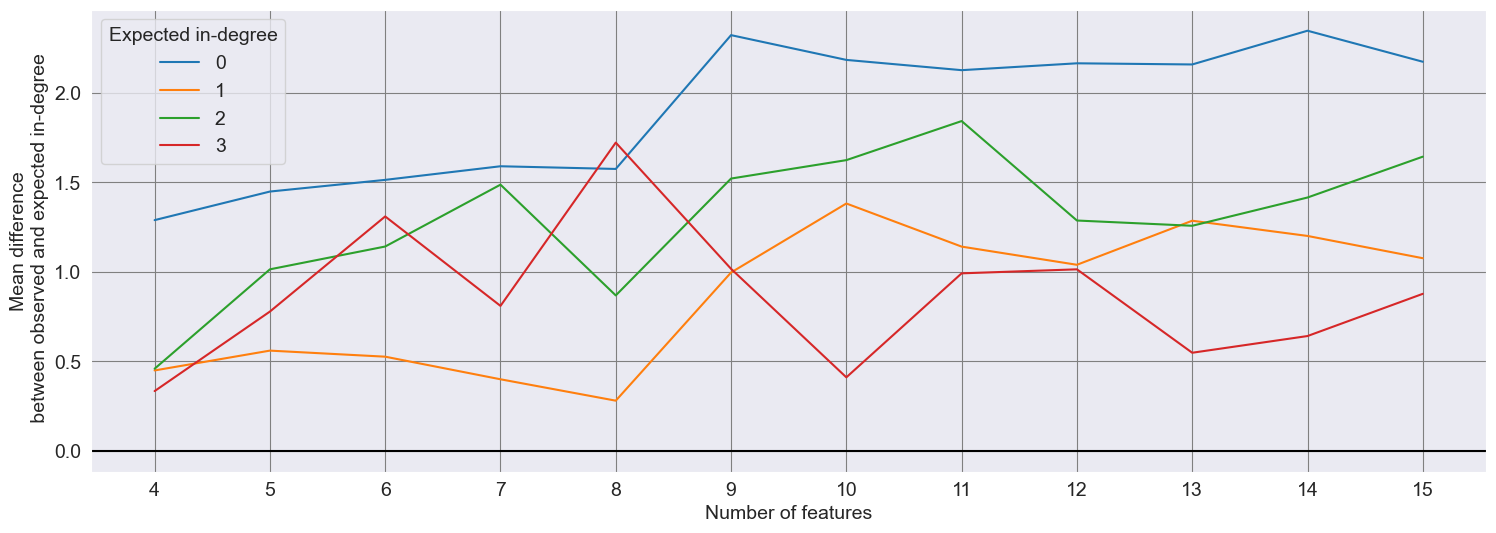

In [54]:
plt.figure(figsize=(18, 6), edgecolor="black")
for i, feat in enumerate(cols[18:22]):
    plt.plot(x, res4[feat]-i, label=str(i))
plt.xlabel("Number of features")
plt.ylabel("Mean difference\n between observed and expected in-degree")
plt.grid(True, color="grey")
plt.legend(loc="upper left", title="Expected in-degree")
plt.axhline(0, c="black")
plt.xticks(x)